# Statistical Analysis + ML Learning Methods
## Data Group 4 (RELIABILITY DATA)

Author: Yahriel Salinas-Reyes

## Importing basic, statistics, and machine learning packages

In [1]:
# Basic packages
import pandas as pd # pandas is used to load and manipulate data and for One-Hot Encoding
import numpy as np # data manipulation
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
import matplotlib.colors as colors      

# Makes some plots look nicer
import seaborn as sns

# Statistical packages
import statsmodels.api as sm
from statsmodels.formula.api import ols   # ordinary least squares model 
import statsmodels.stats.multicomp        # option for ANOVA, not used yet

# The machine learning modules
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve 
from sklearn import svm
from sklearn.utils import resample # downsample the dataset
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn import preprocessing # scale and center data
from sklearn.svm import SVC # this will make a support vector machine for classificaiton
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.decomposition import PCA # to perform PCA to plot the data

In [2]:
# Read In Data
df = pd.read_csv("Reliability2.csv")
# Get the data into a pandas dateframe.  
#df = pd.read_csv('Yaya.csv', 
#                 header=1, ## NOTE: The second line contains column names, so we skip the first line
#                 sep='\t') ## NOTE: Pandas automatically detects delimeters, but it never hurts to be specific
#df.drop('Group', axis=0, inplace=True) ## set axis=0 to remove rows, axis=1 to remove columns
#df.drop(columns=['Group', 'Set', 'AbsJ', 'J', 'I', 't', 'R'])
#df.drop(columns=['Group'])

df.head()



,Group,Set,Trial,Sweep,B_Length,B_Thickness,R_Length,PR,GF,dR/R_0,Strain,V,I,R,J,t,R_Control,Variance,Pass
0,4,1,1,1,44.15,0.26,8,0.5,0.030835,0.007576,0.245687,0.00,0.000000,0.0,0.00427,0.000,0.000000,0.0,1
1,4,1,1,1,44.15,0.26,8,0.5,0.030835,0.007576,0.245687,0.05,0.000036,1400.0,9.21000,0.381,108.893626,41700.0,0
2,4,1,1,1,44.15,0.26,8,0.5,0.030835,0.007576,0.245687,0.10,0.000071,1400.0,18.40000,0.569,217.787251,23300.0,0
3,4,1,1,1,44.15,0.26,8,0.5,0.030835,0.007576,0.245687,0.15,0.000107,1400.0,27.60000,1.140,326.680877,14400.0,0
4,4,1,1,1,44.15,0.26,8,0.5,0.030835,0.007576,0.245687,0.20,0.000142,1400.0,36.70000,1.330,435.574502,9300.0,0


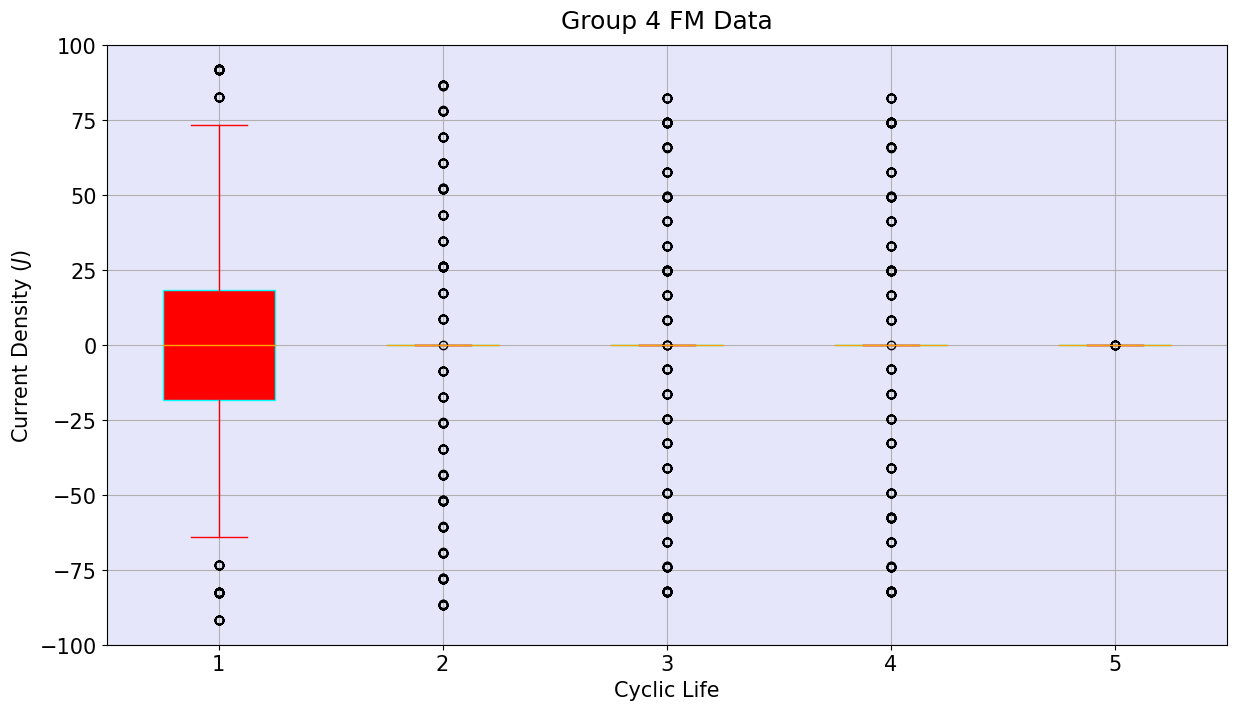

In [23]:

# this makes a box plot sorted by experiment
# boxplot is an axes object
# It was a hassle to figure out how to edit the colors for the boxes
# Turning on patch_artist applies some default colors 

boxplot = df.boxplot('J', by='Trial', vert=True, patch_artist=True,   
            boxprops=dict(facecolor='red', color='cyan'), # doesn't work 
            capprops=dict(color='red'),                   # works
            whiskerprops=dict(color='red'),               # doesn't work
            medianprops=dict(color='orange'),             # does not work
            figsize=(14,8))                               # works

fig = boxplot.get_figure()                                # a work around to get rid of annoying auto-title
fig.suptitle('')

boxplot.patch.set_facecolor('lavender')         # Changes plot background
# plt.style.use('seaborn') # Does not do anything

plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
font = {'size': 15}
plt.xlabel('Cyclic Life', font)
plt.ylabel(r'Current Density ($J$)', font)
plt.ylim(-100,100)
plt.title('Group 4 FM Data', fontsize=18, pad = 12)
plt.show()

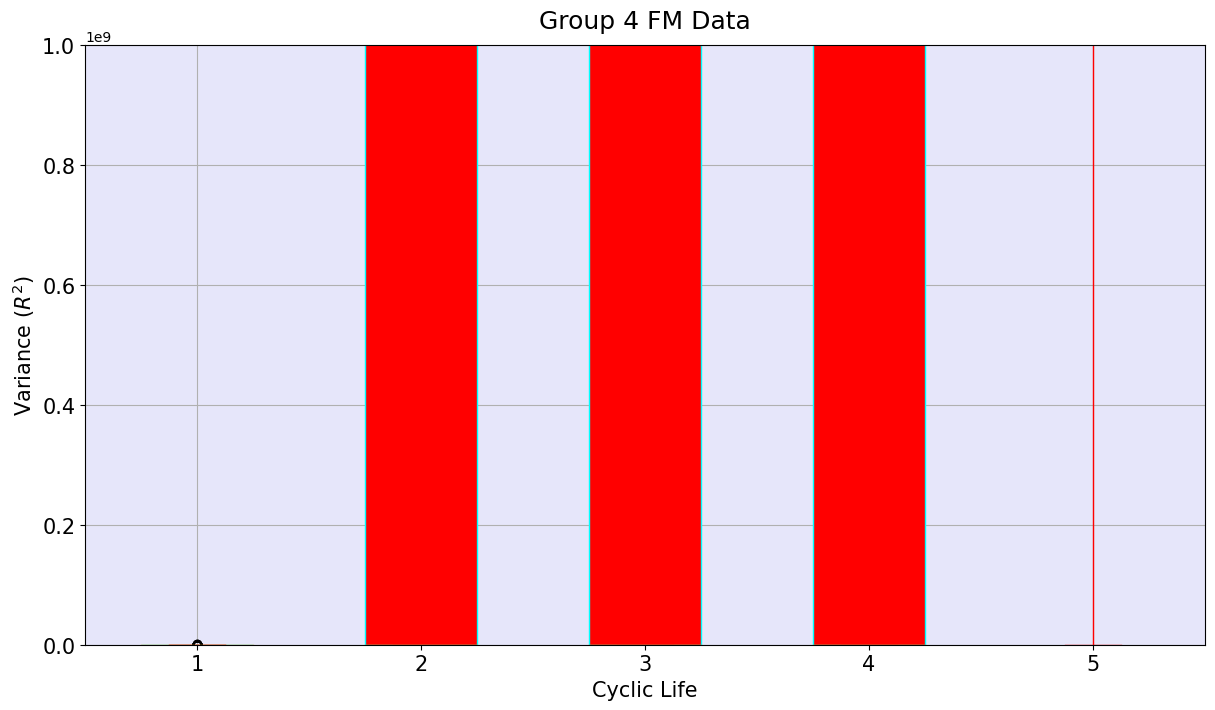

In [26]:

# this makes a box plot sorted by experiment
# boxplot is an axes object
# It was a hassle to figure out how to edit the colors for the boxes
# Turning on patch_artist applies some default colors 

boxplot = df.boxplot('Variance', by='Trial', vert=True, patch_artist=True,   
            boxprops=dict(facecolor='red', color='cyan'), # doesn't work 
            capprops=dict(color='red'),                   # works
            whiskerprops=dict(color='red'),               # doesn't work
            medianprops=dict(color='orange'),             # does not work
            figsize=(14,8))                               # works

fig = boxplot.get_figure()                                # a work around to get rid of annoying auto-title
fig.suptitle('')

boxplot.patch.set_facecolor('lavender')         # Changes plot background
# plt.style.use('seaborn') # Does not do anything

plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
font = {'size': 15}
plt.xlabel('Cyclic Life', font)
plt.ylabel(r'Variance ($R^2$) Value', font)
plt.ylim(-10,1000000000)
plt.title('Group 4 FM Data', fontsize=18, pad = 12)
plt.show()

In [6]:
df.drop('Group', axis=1, inplace=True) ## set axis=0 to remove rows, axis=1 to remove columns
#df.drop('Sweep', axis=1, inplace=True) ## set axis=0 to remove rows, axis=1 to remove columns
df.drop('R_Control', axis=1, inplace=True) ## set axis=0 to remove rows, axis=1 to remove columns
df.drop('Variance', axis=1, inplace=True) ## set axis=0 to remove rows, axis=1 to remove columns
df.head()

,Set,Trial,Sweep,B_Length,B_Thickness,R_Length,PR,GF,dR/R_0,Strain,V,I,R,J,t,Pass
0,1,1,1,44.15,0.26,8,0.5,0.030835,0.007576,0.245687,0.00,0.000000,0.0,0.00427,0.000,1
1,1,1,1,44.15,0.26,8,0.5,0.030835,0.007576,0.245687,0.05,0.000036,1400.0,9.21000,0.381,0
2,1,1,1,44.15,0.26,8,0.5,0.030835,0.007576,0.245687,0.10,0.000071,1400.0,18.40000,0.569,0
3,1,1,1,44.15,0.26,8,0.5,0.030835,0.007576,0.245687,0.15,0.000107,1400.0,27.60000,1.140,0
4,1,1,1,44.15,0.26,8,0.5,0.030835,0.007576,0.245687,0.20,0.000142,1400.0,36.70000,1.330,0


In [7]:
#df.dtypes
# converting data types to int

df['B_Length'] = df['B_Length'].apply(np.int64)
df['B_Thickness'] = df['B_Thickness'].apply(np.int64)
df['PR'] = df['PR'].apply(np.int64)
df['GF'] = df['GF'].apply(np.int64)
df['dR/R_0'] = df['dR/R_0'].apply(np.int64)
df['Strain'] = df['Strain'].apply(np.int64)
df['V'] = df['V'].apply(np.int64)
df['I'] = df['I'].apply(np.int64)
df['R'] = df['R'].apply(np.int64)
df['J'] = df['J'].apply(np.int64)
df['t'] = df['t'].apply(np.int64)
  
# displaying the datatypes
display(df.dtypes)

Set            int64
Trial          int64
Sweep          int64
B_Length       int64
B_Thickness    int64
R_Length       int64
PR             int64
GF             int64
dR/R_0         int64
Strain         int64
V              int64
I              int64
R              int64
J              int64
t              int64
Pass           int64
dtype: object

- **Group**, Experimental Group Data **Category**
- **Set**, Sensor Sample # **Category**
- **ID**, Experimental Run # **Category**
- **B Area**, Paper Beam Surface Area **Integer**
- **B Length**, Paper Beam Length **Integer**
- **B Thickness**, Paper Beam Thickness **Integer**
- **PR(nu)**, Poission's Ratio of Substrate Material **Integer**
- **R Area**, PZR Cross-Sectional Area **Integer**
- **R Length**, PZR Length **Integer**
- **R Location**, PZR Location Along Beam **Integer**
- **Contacts**, FM or SP Contact Pads **Category**
- **GF**, Gauage Factor of Sensor **Integer**
- **dR/R_0**, Relative Change in R **Integer**
- **Strain**, Strain Along Beam **Integer**
- **Voltage**, Voltage Measured  **Integer**
- **I**, Strain Measured **Integer**
- **Resistance**, Measured Resistance **Integer**
- **J**, J Measured **Integer**
- **Time**, Time Measured **Integer**
- **Variance**, Measured Signal Variance **Integer**
- **R_Control**, Control Resistance Values **Integer**
- **Pass**, Yes/No **Category**

In [8]:
df['Set'].unique

<bound method Series.unique of 0       1
1       1
2       1
3       1
4       1
       ..
4295    2
4296    2
4297    2
4298    2
4299    2
Name: Set, Length: 4300, dtype: int64>

In [9]:
len(df)
df_no_pass = df[df['Pass'] == 0]
df_pass = df[df['Pass'] == 1]

#Downsample Data
df_no_pass_downsampled = resample(df_no_pass,
                                  replace=False,
                                  n_samples=1000,
                                  random_state=42)
#len(df_no_pass_downsampled)

#Downsample Data
df_pass_downsampled = resample(df_pass,
                                  replace=False,
                                  n_samples=1000,
                                  random_state=42)
#len(df_pass_downsampled)

df_downsample = pd.concat([df_no_pass_downsampled, df_pass_downsampled])
len(df_downsample)

2000

In [10]:
#SPlit Data Set
X = df_downsample.drop('Pass', axis=1).copy() # alternatively: X = df_no_missing.iloc[:,:-1].copy()
X.head()

y = df_downsample['Pass'].copy()
y.head()

#Encode Data
X_encoded = pd.get_dummies(X, columns=['Set',
                                       'Trial',
                                       'GF', 
                                       'dR/R_0',
                                       'Strain',
                                       'Sweep'])
X_encoded.tail()

,B_Length,B_Thickness,R_Length,PR,V,I,R,J,t,Set_1,...,Sweep_1,Sweep_2,Sweep_3,Sweep_4,Sweep_5,Sweep_6,Sweep_7,Sweep_8,Sweep_9,Sweep_10
106,44,0,8,0,0,0,1400,9,27,1,...,0,0,1,0,0,0,0,0,0,0
2557,44,0,8,0,0,0,5680,2,118,0,...,0,0,0,0,0,0,0,0,0,1
293,44,0,8,0,0,0,1410,-64,77,1,...,0,0,0,0,0,0,1,0,0,0
1026,44,0,8,0,0,0,1570,-41,46,1,...,0,0,0,1,0,0,0,0,0,0
1333,44,0,8,0,0,0,0,0,11,1,...,0,1,0,0,0,0,0,0,0,0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

c:\Users\yahri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


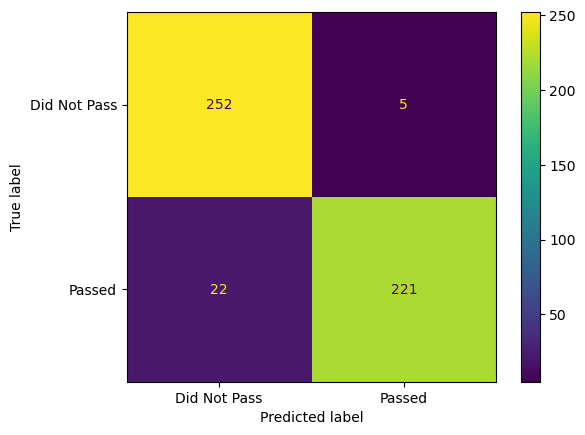

In [13]:
plot_confusion_matrix(clf_svm, 
                      X_test_scaled, 
                      y_test,
                      values_format='d',
                      display_labels=["Did Not Pass", "Passed"])

param_grid = [
  {'C': [0.5, 1, 10, 100], # NOTE: Values for C must be > 0
   'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf']},
]
## NOTE: We are includeing C=1 and gamma='scale'
## as possible choices since they are the default values.

optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        scoring='accuracy', ## (accruacy is default scoring) Slightly improved, but hardly!!! C=1, gamma=0.01
        ##scoring='balanced_accuracy', ## Slightly improved, but hardly!!! C=1, gamma=0.01
        ##scoring='f1', ## Terrible!!! C=0.5, gamma=1
        ##scoring='f1_micro', ## Slightly improved, but hardly!!! C=1, gamma=0.01
        ##scoring='f1_macro', ## Same!! C=1, gamma='scale' (these are the same as default values)
        ##scoring='f1_weighted', ## Same!! C=1, gamma='scale' (these are the same as default values)
        ##scoring='roc_auc', ## Terrible!!! C=1, gamma=0.001
        ## For more scoring metics see: 
        ## https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        verbose=0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
    )

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

c:\Users\yahri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


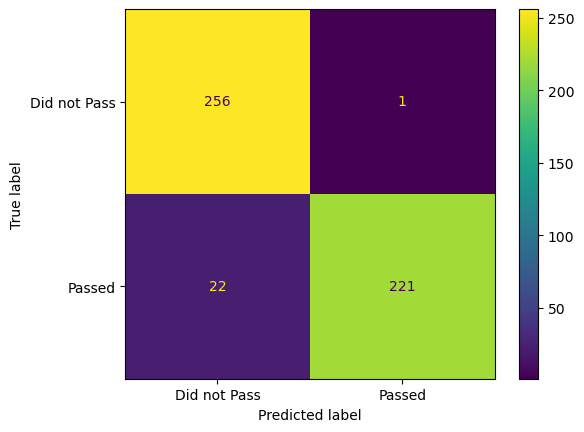

In [14]:
clf_svm = SVC(random_state=42, C=100, gamma='scale')
clf_svm.fit(X_train_scaled, y_train)

plot_confusion_matrix(clf_svm, 
                      X_test_scaled, 
                      y_test,
                      values_format='d',
                      display_labels=["Did not Pass", "Passed"])


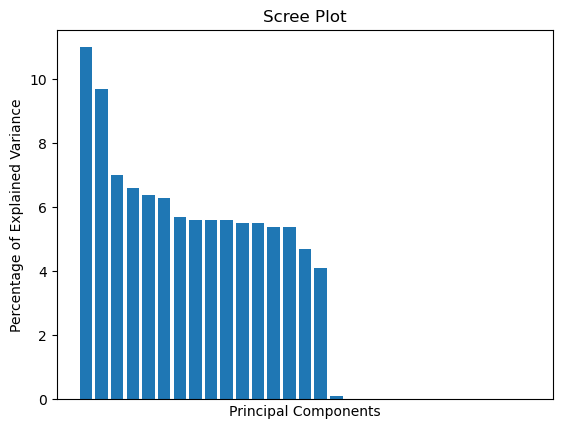

In [15]:
len(df_downsample.columns)

pca = PCA() # NOTE: By default, PCA() centers the data, but does not scale it.
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [16]:
train_pc1_coords = X_train_pca[:, 0] 
train_pc2_coords = X_train_pca[:, 1]

## NOTE:
## pc1 contains the x-axis coordinates of the data after PCA
## pc2 contains the y-axis coordinates of the data after PCA

## Now center and scale the PCs...
pca_train_scaled = preprocessing.scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

## Now we optimize the SVM fit to the x and y-axis coordinates
## of the data after PCA dimension reduction...
param_grid = [
  {'C': [1, 10, 100, 1000], 
   'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf']},
]

optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        scoring='accuracy', # NOTE: The default value for scoring results in worse performance...
        ## For more scoring metics see: 
        ## https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        verbose=0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
    )

optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


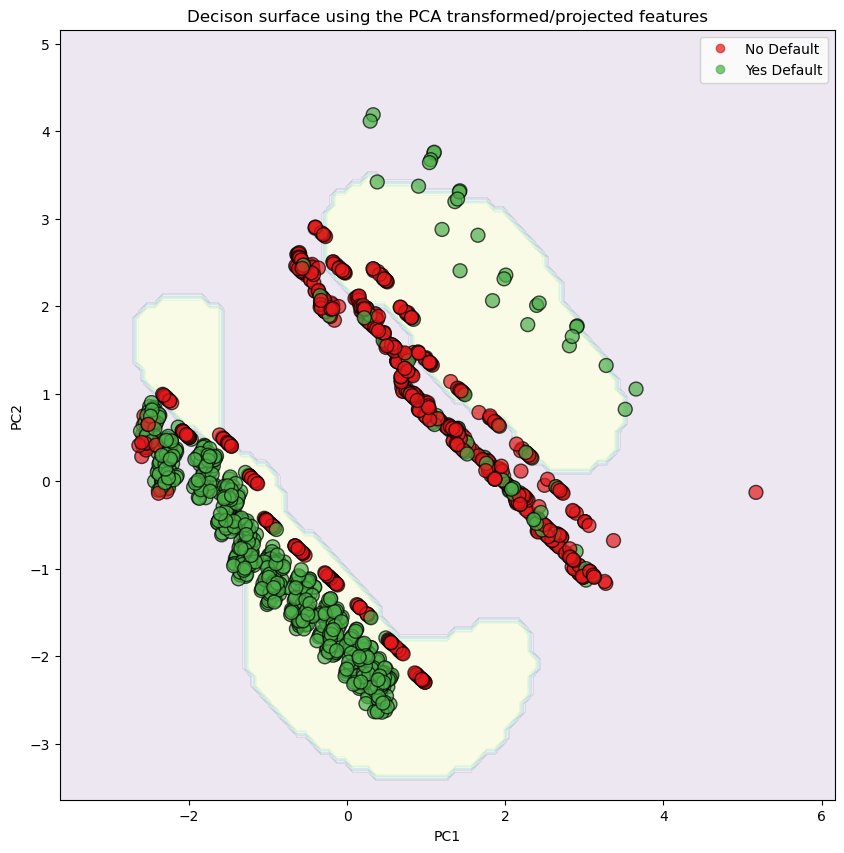

In [17]:
clf_svm = SVC(random_state=42, C=1000, gamma=1)
clf_svm.fit(pca_train_scaled, y_train)

## Transform the test dataset with the PCA...
X_test_pca = pca.transform(X_train_scaled)
#X_test_pca = pca.transform(X_test_scaled)
test_pc1_coords = X_test_pca[:, 0] 
test_pc2_coords = X_test_pca[:, 1]

## Now create a matrix of points that we can use to show
## the decision regions.
## The matrix will be a little bit larger than the
## transformed PCA points so that we can plot all of
## the PCA points on it without them being on the edge
x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

## now we will classify every point in that 
## matrix with the SVM. Points on one side of the 
## classification boundary will get 0, and points on the other
## side will get 1.
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
## Right now, Z is just a long array of lots of 0s and 1s, which
## reflect how each point in the mesh was classified.
## We use reshape() so that each classification (0 or 1) corresponds
## to a specific point in the matrix.
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))
## now we will use contourf() to draw a filled contour plot
## using the matrix values and classifications. 
## The contours will be filled according to the 
## predicted classifications (0s and 1s) in Z
ax.contourf(xx, yy, Z, alpha=0.1)

## now create custom colors for the actual data points
cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])
## now draw the actual data points - these will
## be colored by their known (not predcited) classifications
## NOTE: setting alpha=0.7 lets us see if we are covering up a point 
# scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_test, 
scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_train, 
               cmap=cmap, 
               s=100, 
               edgecolors='k', ## 'k' = black
               alpha=0.7)

## now create a legend
legend = ax.legend(scatter.legend_elements()[0], 
                   scatter.legend_elements()[1],
                    loc="upper right")
legend.get_texts()[0].set_text("No Default")
legend.get_texts()[1].set_text("Yes Default")

## now add axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decison surface using the PCA transformed/projected features')
# plt.savefig('svm_default.png')
plt.show()

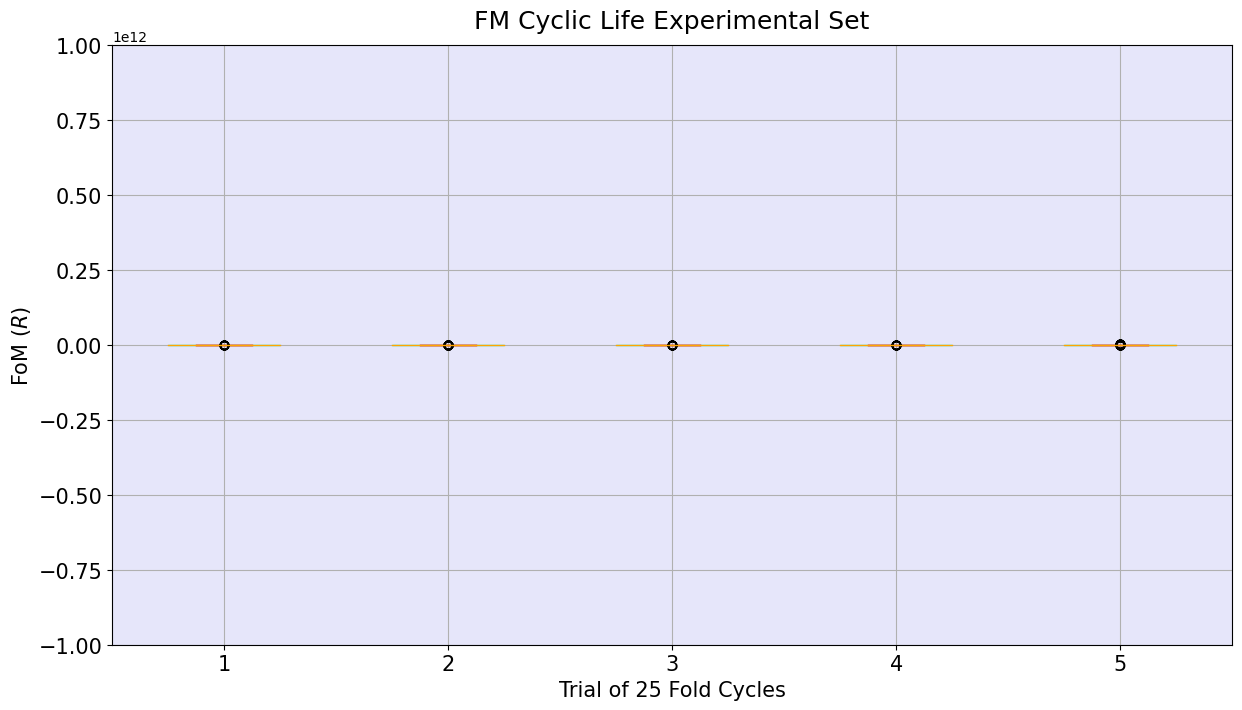

              df        sum_sq       mean_sq           F         PR(>F)
C(Trial)     4.0  1.532248e+30  3.830620e+29  145.294521  1.703443e-101
C(Sweep)     9.0  5.877731e+29  6.530812e+28   24.771220   2.683703e-39
C(V)        20.0  1.337755e+30  6.688774e+28   25.370366   5.557908e-78
C(t)       906.0  2.966834e+31  3.274652e+28   12.420678  9.486060e-322
Residual  1210.0  3.190106e+30  2.636452e+27         NaN            NaN


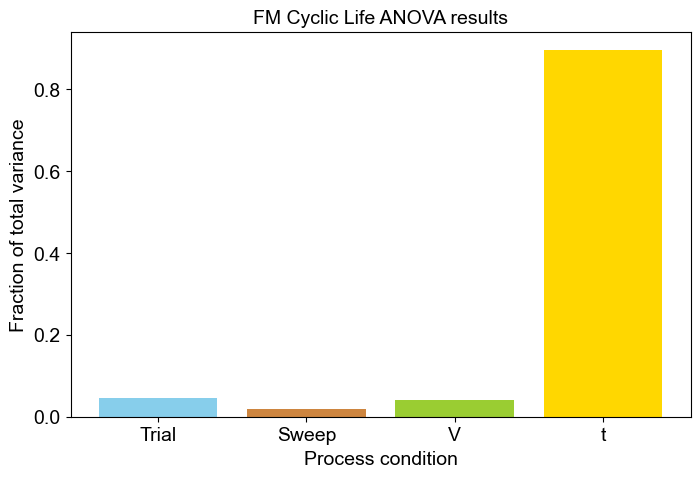

In [18]:

df1 = pd.read_csv("ReliabilityFM.csv")                 # first run



boxplot = df1.boxplot('R', by='Trial', vert=True, patch_artist=True,   
            boxprops=dict(facecolor='red', color='cyan'), # doesn't work 
            capprops=dict(color='red'),                   # works
            whiskerprops=dict(color='red'),               # doesn't work
            medianprops=dict(color='orange'),             # does not work
            figsize=(14,8))                               # works

fig = boxplot.get_figure()                                # a work around to get rid of annoying auto-title
fig.suptitle('')

boxplot.patch.set_facecolor('lavender')         # Changes plot background
# plt.style.use('seaborn') # Does not do anything

plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
font = {'size': 15}
plt.xlabel('Trial of 25 Fold Cycles', font)
plt.ylabel(r'FoM ($R$)', font)
#plt.ylim(1399,1700)
plt.ylim(-1000000000000,1000000000000)
plt.title('FM Cyclic Life Experimental Set', fontsize=18, pad = 12)
plt.show()


model = ols('Variance ~ C(Trial) + C(Sweep) + C(V) + C(t)', df1).fit()

model.summary()
res = sm.stats.anova_lm(model, typ= 1)   # Need type 1 to agree with paper and with Matlab
print(res)     #  this write the model summary to the console

#  Now make the bar graph
objects = (df1.columns[2],   # These are the column labels (factors)
           df1.columns[3],
           df1.columns[11],
           df1.columns[15])

y_pos = np.arange(len(objects))  # this just makes an array [0, 1, 2, 3]
                                 # arrange makes evenly spaced values on a 
                                 # given interval.  Sort of expects integers

totalSSRnoRes = sum(res.sum_sq)-res.sum_sq[-1]  # for normalizing

performance = [res.sum_sq[0]/totalSSRnoRes,     # these are the bar lengths
               res.sum_sq[1]/totalSSRnoRes, 
               res.sum_sq[2]/totalSSRnoRes, 
               res.sum_sq[3]/totalSSRnoRes]

plt.figure(figsize=(8,5), dpi=100)                   
plt.bar(y_pos, performance,       
        align='center', 
        width=0.8,              # default is 0.8
        alpha=1.0,              # this is transparency, 1.0 is solid
        color=['skyblue', 'peru', 'yellowgreen', 'gold'])

plt.xticks(y_pos, objects)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#font = {'size': 18}
plt.xlabel('Process condition', fontsize=14)
plt.ylabel('Fraction of total variance', fontsize=14)
plt.title('FM Cyclic Life ANOVA results', fontsize=14)

plt.style.use('seaborn')        # this makes a lightgrey background with a nice grid

plt.show()

# this makes a box plot sorted by experiment
# boxplot is an axes object
# It was a hassle to figure out how to edit the colors for the boxes
# Turning on patch_artist applies some default colors 

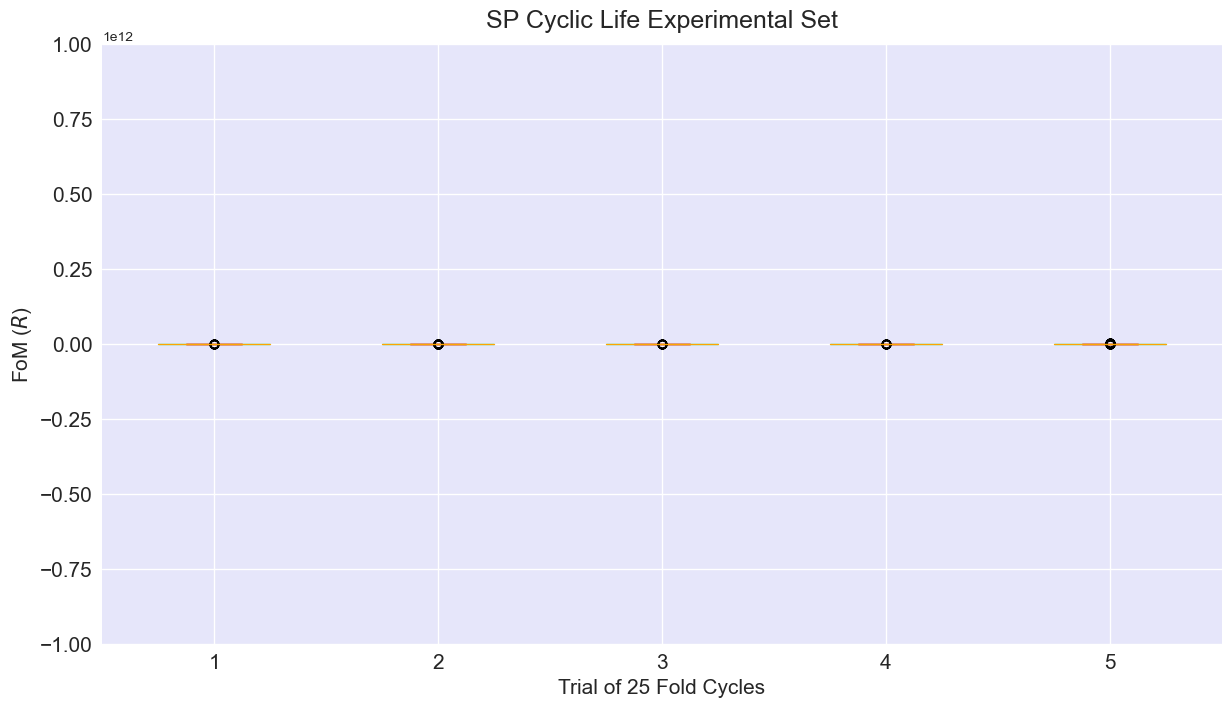

              df        sum_sq       mean_sq         F    PR(>F)
C(Trial)     4.0  3.755100e+38  9.387751e+37  1.901271  0.107937
C(Sweep)     9.0  2.811194e+38  3.123549e+37  0.632602  0.769859
C(V)        20.0  1.096506e+39  5.482530e+37  1.110359  0.331481
C(t)       948.0  1.856234e+40  1.958053e+37  0.396558  1.000000
Residual  1168.0  5.767139e+40  4.937619e+37       NaN       NaN


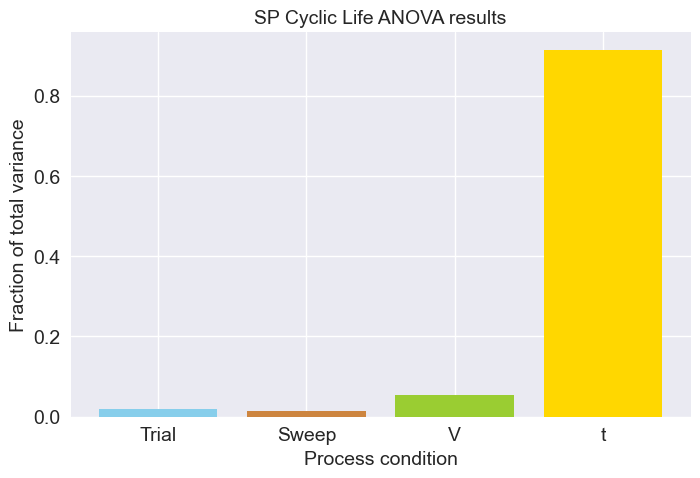

In [19]:

df2 = pd.read_csv("ReliabilitySP.csv")                 # first run



boxplot = df1.boxplot('R', by='Trial', vert=True, patch_artist=True,   
            boxprops=dict(facecolor='red', color='cyan'), # doesn't work 
            capprops=dict(color='red'),                   # works
            whiskerprops=dict(color='red'),               # doesn't work
            medianprops=dict(color='orange'),             # does not work
            figsize=(14,8))                               # works

fig = boxplot.get_figure()                                # a work around to get rid of annoying auto-title
fig.suptitle('')

boxplot.patch.set_facecolor('lavender')         # Changes plot background
# plt.style.use('seaborn') # Does not do anything

plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
font = {'size': 15}
plt.xlabel('Trial of 25 Fold Cycles', font)
plt.ylabel(r'FoM ($R$)', font)
plt.ylim(-1000000000000,1000000000000)
plt.title('SP Cyclic Life Experimental Set', fontsize=18, pad = 12)
plt.show()


model = ols('Variance ~ C(Trial) + C(Sweep) + C(V) + C(t)', df2).fit()

model.summary()
res = sm.stats.anova_lm(model, typ= 1)   # Need type 1 to agree with paper and with Matlab
print(res)     #  this write the model summary to the console

#  Now make the bar graph
objects = (df1.columns[2],   # These are the column labels (factors)
           df1.columns[3],
           df1.columns[11],
           df1.columns[15])

y_pos = np.arange(len(objects))  # this just makes an array [0, 1, 2, 3]
                                 # arrange makes evenly spaced values on a 
                                 # given interval.  Sort of expects integers

totalSSRnoRes = sum(res.sum_sq)-res.sum_sq[-1]  # for normalizing

performance = [res.sum_sq[0]/totalSSRnoRes,     # these are the bar lengths
               res.sum_sq[1]/totalSSRnoRes, 
               res.sum_sq[2]/totalSSRnoRes, 
               res.sum_sq[3]/totalSSRnoRes]

plt.figure(figsize=(8,5), dpi=100)                   
plt.bar(y_pos, performance,       
        align='center', 
        width=0.8,              # default is 0.8
        alpha=1.0,              # this is transparency, 1.0 is solid
        color=['skyblue', 'peru', 'yellowgreen', 'gold'])

plt.xticks(y_pos, objects)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#font = {'size': 18}
plt.xlabel('Process condition', fontsize=14)
plt.ylabel('Fraction of total variance', fontsize=14)
plt.title('SP Cyclic Life ANOVA results', fontsize=14)

plt.style.use('seaborn')        # this makes a lightgrey background with a nice grid

plt.show()


# this makes a box plot sorted by experiment
# boxplot is an axes object
# It was a hassle to figure out how to edit the colors for the boxes
# Turning on patch_artist applies some default colors 

c:\Users\yahri\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


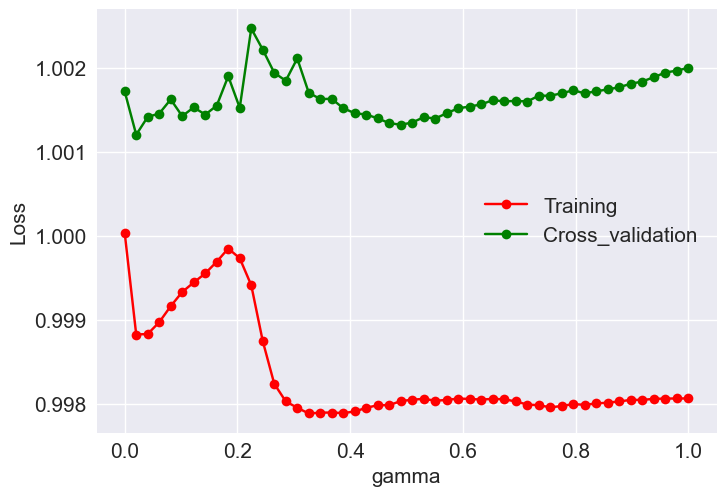

c:\Users\yahri\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


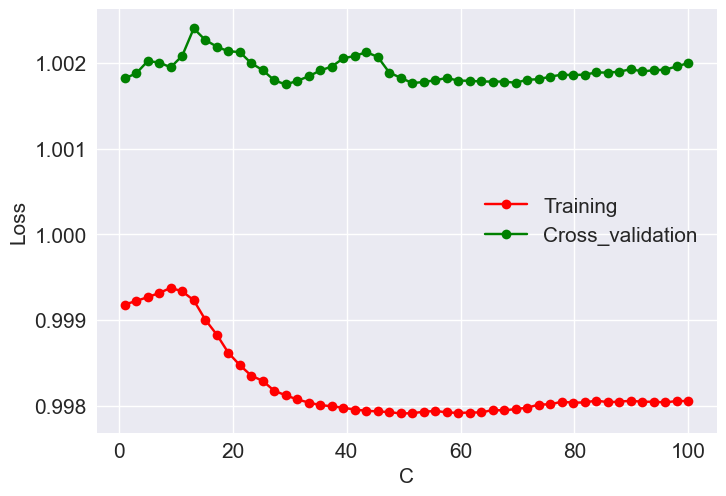

c:\Users\yahri\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


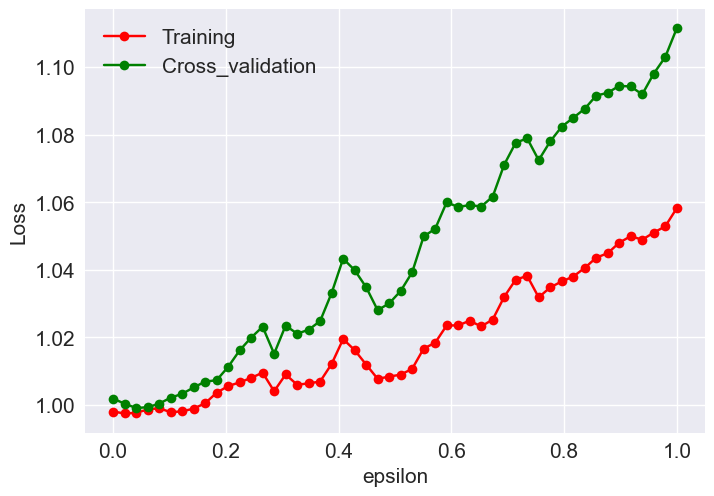

In [20]:
# Select data from dataframe and put into X matrix (parameters) and y (target)
data = df[['Trial','V','J','t']]
target = df[['R']]
X = data       # is nx4 matrix with 4 columns for the 4 factors   
y = target     # is nx1 column vector for n observations

#test gamma value between 0 and 1
# cv = 10 is for 10 fold cross validation. 
param_range = np.linspace(0,1,50)   # set the range for parameter gamma
train_loss, test_loss = validation_curve( 
        svm.SVR(kernel='rbf', C=40),
        preprocessing.scale(X.values), preprocessing.scale(y.values.ravel()), param_name='gamma',
        param_range=param_range, cv=10, 
        scoring = 'neg_mean_squared_error')
# Use negative to 
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

# make the learning curve for gamma
plt.figure(1)
plt.plot(param_range, train_loss_mean, 'o-', color="r", label="Training")
plt.plot(param_range, test_loss_mean, 'o-', color="g", label="Cross_validation")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
font = {'size': 15}
plt.xlabel("gamma", font)
plt.ylabel("Loss", font)
plt.legend(loc="best", fontsize=15)
plt.style.use('seaborn')
plt.show()


#test C value
param_range = np.linspace(1,100,50)   # set the range for parameter C, between 0 and 100
train_loss, test_loss = validation_curve(
        svm.SVR(kernel='rbf', gamma=0.3), 
        preprocessing.scale(X.values), preprocessing.scale(y.values.ravel()), param_name='C',
        param_range=param_range, cv=10, 
        scoring = 'neg_mean_squared_error')
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)
# use minus to avoid negatives

# make the learning curve for C
plt.figure(2)
plt.plot(param_range, train_loss_mean, 'o-', color="r", label="Training")
plt.plot(param_range, test_loss_mean, 'o-', color="g", label="Cross_validation")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
font = {'size': 15}
plt.xlabel("C", font)
plt.ylabel("Loss", font)
plt.legend(loc="best", fontsize=15)
plt.style.use('seaborn')
plt.show()


#test epsilon value
param_range = np.linspace(0,1,50)   # set the range for parameter gamma
train_loss, test_loss = validation_curve( 
        svm.SVR(kernel='rbf', C=40, gamma=0.3),
        preprocessing.scale(X.values), preprocessing.scale(y.values.ravel()), param_name='epsilon',
        param_range=param_range, cv=10, 
        scoring = 'neg_mean_squared_error')
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

# make the learning curve for epsilon
plt.figure(3)
plt.plot(param_range, train_loss_mean, 'o-', color="r", label="Training")
plt.plot(param_range, test_loss_mean, 'o-', color="g", label="Cross_validation")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
font = {'size': 15}
plt.xlabel("epsilon", font)
plt.ylabel("Loss", font)
plt.legend(loc="best", fontsize=15)
plt.style.use('seaborn')
plt.show()

# Should figure out how to make 3 subplots


[LibSVM]

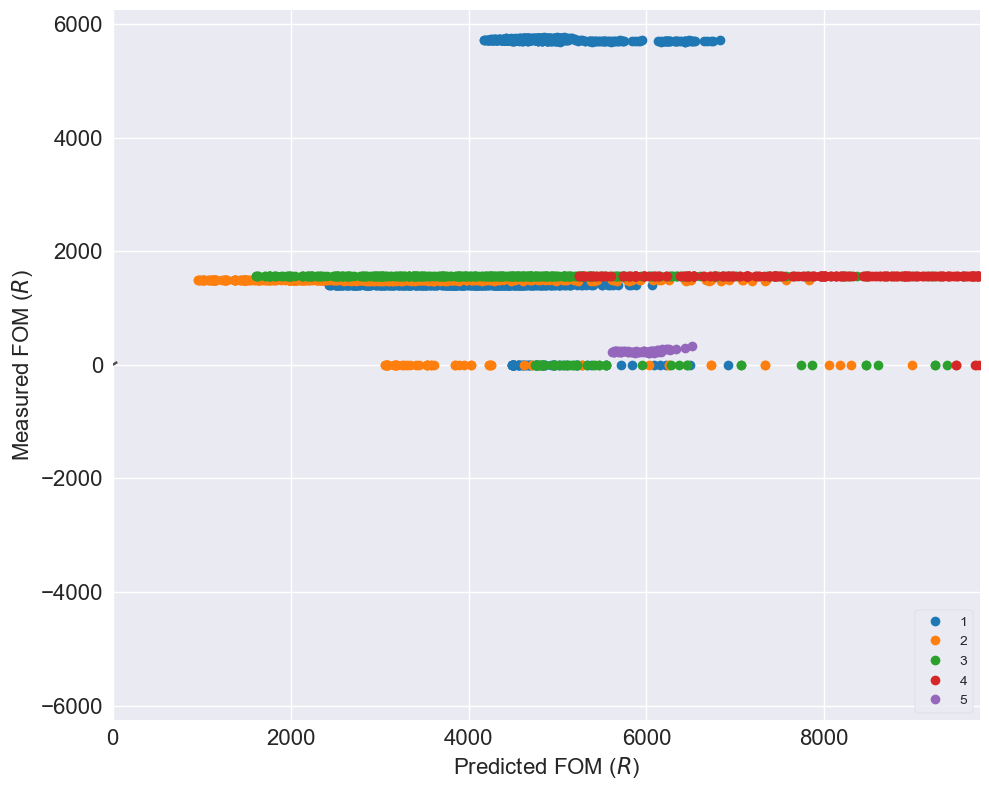

<Figure size 800x550 with 0 Axes>

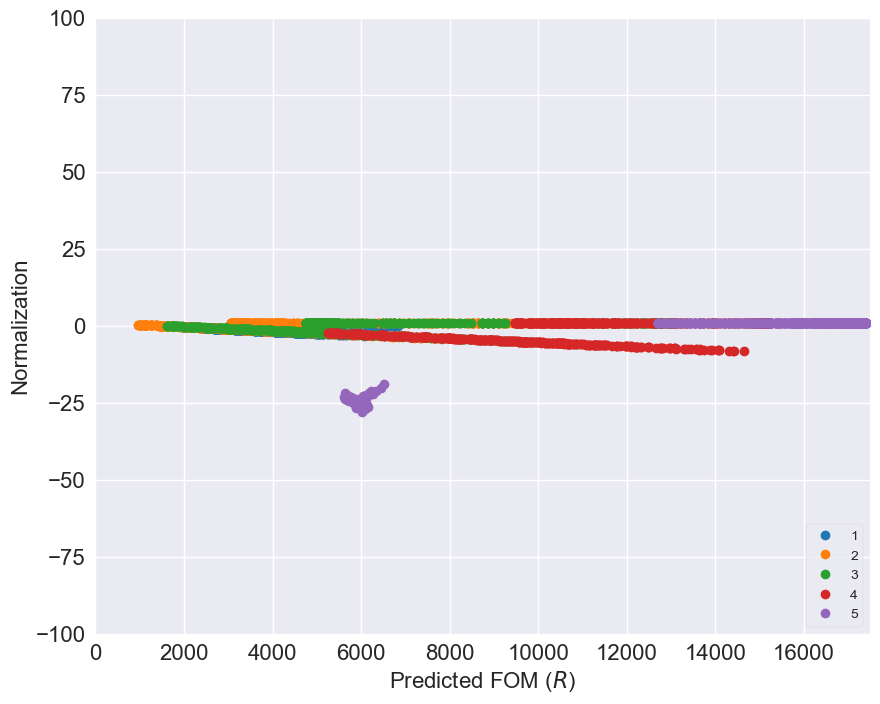

c:\Users\yahri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:


# Make a list of variables for machine learning
names = ('Trial','V','J','t')
variables = df.loc[:, names]           

# this constructs the SVR model using the hyperparameters from the previous step
reg_FoM = Pipeline([('scl', StandardScaler()),
                    ('clf', svm.SVR(kernel='rbf', gamma=0.5, 
                                    C=40, epsilon = 0.1,
                                    verbose=True))])
#  Pipeline somehow allows several commands to be strung together
#  scl = Standard scalar
#  clf = ??  Not sure what this does
#  svm = Support vector machine
#  SVR = Support Vector Regression
#  rbf = Radial basis function kernel 
#  gamma, C, and epsilon are hyperparameters for the rbf kernal

# Fit the variables to the FoM
reg_FoM.fit(variables, df.R)     

# Add a column to the dataframe with the prediceted values
df['FoM_pred_svm'] = reg_FoM.predict(variables)


# Making unique colors for the 32 datasets
colors = plt.cm.tab20(np.linspace(0, 1, 10)[0:len(df.Trial.unique())])
color_dic = {label: color for label, color in zip(df.Trial.unique(), colors)}

# associates a color with the labels in the dataframe.  
df['color'] = df.Trial.map(color_dic)    

#  Now make the plot of predicted vs. measured FoM
fig, ax1 = plt.subplots(1, 1, 
                        clear=True,      
                        num='Predicted vs measured FoM',   # sets the label at the top of the window
                        figsize=(10, 8))   # 
for label, data in df.groupby('Trial'):   # loop through to catch each experimental condition
    plt.plot('FoM_pred_svm', 'R', 'o',  
             color=data['color'].iloc[0],
             data=data,                   # refers back to reference to dataframe
             label=label)
plt.legend(loc='lower right', frameon=True)     # make a legend
plt.plot([0, 50], [0, 50], ls="--", c=".3")  # This draws a dotted line
plt.autoscale(enable=False)                    # turn off autoscale
plt.xlim(0,9750)                             # setting plot range here
plt.ylim(-6250,6250)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
font = {'size': 16}
ax1.set_xlabel(r'Predicted FOM ($R$)', font)
ax1.set_ylabel(r'Measured FOM ($R$)', font)

plt.style.use('seaborn')                 # Best style for this plot

plt.tight_layout()                       # finally, show the plot, 
plt.show()                               # tight means push plot to edges of the window

#  this is to make plot of Normalized measured-predicted vs. measured 
plt.figure(3)  
fig, ax1 = plt.subplots(1, 1, 
                        clear=True,       
                        num='Predicted vs measured FoM',   # sets the label at the top of the window
                        figsize=(10, 8))   # 
df['min'] = (df.R-df.FoM_pred_svm)/df.R
for label, data in df.groupby('Trial'):   # loop through to catch each experimental condition
    plt.plot('FoM_pred_svm', 'min', 'o',  
             color=data['color'].iloc[0],
             data=data,                   # refers back to reference to dataframe
             label=label)
plt.legend(loc='lower right', frameon=True)    
plt.xlim(0,17500)
plt.ylim(-100,100)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
font = {'size': 16}
ax1.set_ylabel('Normalization', font)
ax1.set_xlabel(r'Predicted FOM ($R$)', font)

plt.style.use('ggplot')
plt.style.use('seaborn')                 

#plt.tight_layout()                       # finally, show the plot, 
plt.show()                               # tight means push plot to edges of the window

#Size of the plot grid
u_len = 2    # 4 columns, one each of the 4 temperature levels
v_len = 21    # 2 rows, one for each Cu/(Cu+Zn) level (0.65 and 0.85)

#the levels for the plots in the grid
us = np.array([1,2])    # Trial
vs = np.array([-0.5,-0.45,-0.4,-0.35,-0.3,-0.25,-0.2,-0.15,-0.1,-0.05,0,0.05,.1,.15,.2,.25,.3,.35,.4,.45,.5])  #Voltage

#x and y axes for the contour plots in the grid
x_len, y_len = 1000, 1000            # number of points to make the contour plot
xs = np.linspace(0, 1.25, x_len)   # vary Strain between 60 and 120 minutes
ys = np.linspace(-1000, 1000, y_len)# Relative_Resistance range, this will be y axis

 
vi, ui, xi, yi = names 
names = ('V', 'Set', 't', 'R')


# Actually making each row manually
fig, axs = plt.subplots(nrows=1, ncols=4,      # 2 row, 4 columns, present position=1
                        sharex=True, sharey=True,   # Same x and y axes
                        clear=True, 
                        num='Support Vector Machine Regression, FOM',        # text at top of window
                        figsize=(20, 4.5))  

for ax, u in zip(axs, us): 
    # zip puts column vectors together, two loops: ax = axs[0,0] and v=0.65; ax = axs[0,1] and v=0.85 
    xm,ym = np.meshgrid(xs,ys)    # makes some sort of mesh, 
    # Edit here to change between 0.65 and 0.85
    vm = 0.25 * np.ones_like(xm)  # change Cu_content at each run to obtain different occasions.
# can also use loop to achieve, will be more complicated
    um = u * np.ones_like(xm)
    # This set the third value you need to send to the predictor
    r = np.c_[vm.flatten(), um.flatten(), xm.flatten(), ym.flatten()] 
    # flatten matrices into column vectors 
    c = reg_FoM.predict(r).reshape(x_len, y_len) 
    # feed flatteed mesh r to the predication algorithm, then reshape the predictions back to a matrix
  
    # Make a contour map
    cmap = ax.contour(xs, ys, c, vmin=-.55, vmax=.55, cmap='gray_r')
    plt.clabel(cmap, inline=1, fontsize=13) # this specifies the contour labels
    # Make a value map inline=1 can also wrote as inline=True
    pmap = ax.pcolormesh(xs, ys, c, 
                    shading='gouraud',
                    vmin=-.55, vmax=.55, 
                    cmap='viridis') # this makes the nice colors 
    df.B_Length = pd.to_numeric(df.B_Length)
    
    # Edit here to change between 0.65 and 0.85
    for label, data in df.query('V == @u and Set == 1').groupby('Trial'): # finds the cases
        ax.plot('t', 'R', 'o', 
                color=data['color'].iloc[0], # used same color for the data points
                data=data.iloc[0], 
                mec='k', # with black outline
                mew=0.5, # line thickness
                label=label)
        ax.legend(loc='upper left', frameon=True) 
        font={'size': 18}
        ax.set_ylabel(f'{yi} ([kOhm])', font) # sets text for y axis label
        ax.set_xlabel(f'{xi} (s)', font) 
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.colorbar(pmap, ax=axs, fraction=0.05) # Finally, add color bar.
plt.show() # and display